In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/drive/My Drive/2.25 Novo/100krand.csv')

In [83]:
df

,patient_id,patient_birth_year,patient_gender,age_during_first_diagnosis,age_during_latest_diagnosis,bmi_latest,common_wt_cm_dx_yn,overweight_dx_yn,any_wt_cm_dx_yn,obesity_dx_yn,baom_label_adult_yn,baom_label_adolescent_yn,overweight_and_wt_cm_dx_yn,obesity_or_ow_and_cm_yn,group_consult_yn,count_group_consult,individual_consult_yn,count_individual_consult,screening_yn,count_screening,surgery_yn,count_surgery,first_consult_service_date,last_consult_service_date,first_surgery_service_date,last_surgery_service_date,total_rx_claims,total_pd_claims,total_pd_saxenda_claims,total_pd_contrave_claims,total_pd_qsymia_claims,total_pd_belviq_claims,total_pd_generic_claims,stdaln_pd_nonlifecycle_claims,stdaln_pd_lifecycle_claims,final_pd_claims,stdaln_rj_nonlifecycle_claims,stdaln_rj_lifecycle_claims,stdaln_rv_nonlifecycle_claims,stdaln_rv_lifecycle_claims,...,latest_prescription_date,rx_latest_prescriber_id,rx_latest_prescriber_state,rx_latest_prescriber_zip,rx_latest_plantrak_id,first_brand_prescribed_saxenda_yn,first_brand_prescribed_other_branded_aoms_yn,first_brand_prescribed_generic_aoms_yn,latest_brand_prescribed_saxenda_yn,latest_brand_prescribed_other_branded_aoms_yn,latest_brand_prescribed_generic_aoms_yn,dx_most_freq_prescriber_id,dx_most_freq_state,dx_most_freq_zip,dx_most_freq_plantrak_id,first_diagnosis_date,dx_first_prescriber_id,dx_first_state,dx_first_zip,dx_first_plantrak_id,latest_diagnosis_date,dx_latest_prescriber_id,dx_latest_state,dx_latest_zip,dx_latest_plantrak_id,days_between_first_diag_latest_diag,days_between_first_consult_latest_consult,days_between_first_surgery_latest_surgery,days_between_first_prescr_latest_prescr,days_between_first_consult_latest_surgery,days_between_first_diag_latest_prescr,days_between_first_diag_first_prescr,days_between_latest_diag_latest_prescr,days_between_latest_diag_first_prescr,joined_prescriber_id,nni_saxenda_gsb,nni_saxenda_target,zip,state,joined_plantrak_id
0,1865026947,1985,M,30,34,>30,N,Y,N,Y,Y,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-09-20,NaN,NaN,NaN,NaN,N,N,Y,N,N,Y,710640.0,WY,83110.0,13110001.0,2015-07-28,710640.0,WY,83110.0,13110001.0,2019-03-08,2380110.0,WY,83110.0,13110001.0,1319.0,NaN,NaN,0,NaN,1515.0,1515,196,196,710640,NaN,NaN,83110,WY,13110001
1,129751242,1965,F,50,54,>30,N,Y,N,Y,Y,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2019-08-14,4196885.0,IL,61615.0,9.100001e+06,N,Y,N,N,Y,N,6401314.0,IL,61614.0,209999.0,2015-09-19,6218213.0,IL,61614.0,209999.0,2019-08-14,4196885.0,IL,61615.0,209999.0,1425.0,NaN,NaN,1127,NaN,1425.0,298,0,-1127,4196885,Tier 2,Y,61615,IL,209999
2,1265217370,1995,M,21,24,>30,N,Y,N,Y,Y,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2017-05-16,5930772.0,TN,37203.0,1.172000e+07,N,Y,N,N,Y,N,5930772.0,TN,37203.0,11720002.0,2016-02-11,1915529.0,TN,37072.0,11720002.0,2019-07-11,5930772.0,TN,37203.0,11720002.0,1246.0,NaN,NaN,15,NaN,460.0,445,-786,-801,5930772,Tier 3,N,37203,TN,11720002
3,682754883,1972,F,45,47,>30,N,Y,N,Y,Y,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,2015-12-24,221151.0,TX,77702.0,1.000100e+04,N,N,Y,N,N,Y,NaN,NaN,NaN,NaN,2017-03-15,NaN,NaN,NaN,NaN,2019-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,NaN,NaN,-703,-1300,-1556,221151,NaN,NaN,77702,TX,10001
4,1054382878,1981,F,34,38,>30,N,Y,N,Y,Y,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0,...,2019-04-29,2352254.0,NY,10473.0,1.000100e+04,N,N,Y,N,N,Y,6626163.0,NY,10473.0,4390018.0,2015-12-16,2352254.0,NY,10473.0,4390018.0,2019-04-15,2352254.0,NY,10473.0,4390018.0,1216.0,NaN,NaN,370,NaN,1230.0,860,14,-356,6626163,No Tier,N,10473,NY,4390018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [84]:
df.nni_saxenda_target.isna().sum()

23664

In [0]:
# list(df.columns)

In [0]:
select_cols = [
  'patient_id',
  'patient_birth_year',
  'patient_gender',
  'age_during_first_diagnosis',
  'age_during_latest_diagnosis',
  'bmi_latest',
  'any_wt_cm_dx_yn',
  'avg_opc_generic_aoms',
  'avg_opc_other_branded_aoms',
  'avg_opc_saxenda',
  'baom_label_adolescent_yn',
  'baom_label_adult_yn',
  'days_between_first_diag_first_prescr',
  'days_between_first_diag_latest_diag',
  'days_between_first_diag_latest_prescr',
  'days_between_first_prescr_latest_prescr',
  'days_between_latest_diag_first_prescr',
  'days_between_latest_diag_latest_prescr',
  'dx_most_freq_plantrak_id',
  # 'dx_most_freq_prescriber_id',
  'dx_most_freq_state',
  'dx_most_freq_zip',
  'obesity_dx_yn',
  'obesity_or_ow_and_cm_yn',
  'prescribed_generic_aoms_yn',
  'prescribed_other_branded_aoms_yn',
  'prescribed_saxenda_yn',
  'rx_first_plantrak_id',
  'rx_first_prescriber_id',
  'rx_first_prescriber_state',
  'rx_first_prescriber_zip',
  'rx_latest_plantrak_id',
  'rx_latest_prescriber_id',
  'rx_latest_prescriber_state',
  'rx_latest_prescriber_zip',
  'rx_most_freq_plantrak_id',
  'rx_most_freq_prescriber_id',
  'rx_most_freq_state',
  'rx_most_freq_zip',
  'total_pd_claims',
  'joined_prescriber_id',
  'nni_saxenda_gsb',
  'nni_saxenda_target',
  'zip',
  'state',
  'joined_plantrak_id'
  ]




Most_freq_plantrak_ID is actually a categorical column

In [87]:
df[select_cols].dx_most_freq_plantrak_id.value_counts()

209999.0      5850
59999.0       3243
12610032.0    2546
12889999.0    2418
11649999.0    2344
              ... 
200698.0         1
200699.0         1
200703.0         1
18160035.0       1
3800003.0        1
Name: dx_most_freq_plantrak_id, Length: 1433, dtype: int64

In [88]:
df[select_cols].dx_most_freq_plantrak_id.isna().sum()

14923

In [89]:
df_sel = df[select_cols]
df_sel

,patient_id,patient_birth_year,patient_gender,age_during_first_diagnosis,age_during_latest_diagnosis,bmi_latest,any_wt_cm_dx_yn,avg_opc_generic_aoms,avg_opc_other_branded_aoms,avg_opc_saxenda,baom_label_adolescent_yn,baom_label_adult_yn,days_between_first_diag_first_prescr,days_between_first_diag_latest_diag,days_between_first_diag_latest_prescr,days_between_first_prescr_latest_prescr,days_between_latest_diag_first_prescr,days_between_latest_diag_latest_prescr,dx_most_freq_plantrak_id,dx_most_freq_state,dx_most_freq_zip,obesity_dx_yn,obesity_or_ow_and_cm_yn,prescribed_generic_aoms_yn,prescribed_other_branded_aoms_yn,prescribed_saxenda_yn,rx_first_plantrak_id,rx_first_prescriber_id,rx_first_prescriber_state,rx_first_prescriber_zip,rx_latest_plantrak_id,rx_latest_prescriber_id,rx_latest_prescriber_state,rx_latest_prescriber_zip,rx_most_freq_plantrak_id,rx_most_freq_prescriber_id,rx_most_freq_state,rx_most_freq_zip,total_pd_claims,joined_prescriber_id,nni_saxenda_gsb,nni_saxenda_target,zip,state,joined_plantrak_id
0,1865026947,1985,M,30,34,>30,N,NaN,NaN,NaN,N,Y,1515,1319.0,1515.0,0,196,196,13110001.0,WY,83110.0,Y,Y,NaN,NaN,NaN,7.000160e+09,2380110.0,WY,83110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710640,NaN,NaN,83110,WY,13110001
1,129751242,1965,F,50,54,>30,N,NaN,64.28,99.99,N,Y,298,1425.0,1425.0,1127,-1127,0,209999.0,IL,61614.0,Y,Y,N,Y,Y,1.367044e+07,4196885.0,IL,61615.0,9.100001e+06,4196885.0,IL,61615.0,9.100001e+06,4196885.0,IL,61615.0,3.0,4196885,Tier 2,Y,61615,IL,209999
2,1265217370,1995,M,21,24,>30,N,NaN,NaN,NaN,N,Y,445,1246.0,460.0,15,-801,-786,11720002.0,TN,37203.0,Y,Y,N,Y,N,1.172000e+07,5930772.0,TN,37203.0,1.172000e+07,5930772.0,TN,37203.0,1.172000e+07,5930772.0,TN,37203.0,0.0,5930772,Tier 3,N,37203,TN,11720002
3,682754883,1972,F,45,47,>30,N,25.98,NaN,NaN,N,Y,-703,NaN,NaN,256,-1556,-1300,NaN,NaN,NaN,Y,Y,Y,N,N,1.000100e+04,221151.0,TX,77702.0,1.000100e+04,221151.0,TX,77702.0,1.000100e+04,221151.0,TX,77702.0,3.0,221151,NaN,NaN,77702,TX,10001
4,1054382878,1981,F,34,38,>30,N,43.33,NaN,NaN,N,Y,860,1216.0,1230.0,370,-356,14,4390018.0,NY,10473.0,Y,Y,Y,N,N,4.390018e+06,6626163.0,NY,10473.0,1.000100e+04,2352254.0,NY,10473.0,1.000100e+04,6626163.0,NY,10473.0,9.0,6626163,No Tier,N,10473,NY,4390018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,739570981,1984,F,32,34,>30,N,NaN,NaN,NaN,N,Y,676,928.0,684.0,8,-252,-244,200543.0,NY,10701.0,Y,Y,N,N,Y,7.000560e+09,3403284.0,NY,10704.0,7.000560e+09,3403284.0,NY,10704.0,7.000560e+09,3403284.0,NY,10704.0,0.0,3403284,Tier 2,Y,10704,NY,7000560001
99996,88886328,1974,F,42,44,>30,Y,9.81,NaN,NaN,N,Y,782,981.0,1039.0,257,-199,58,12630002.0,MI,48423.0,Y,Y,Y,N,N,1.263000e+07,2567566.0,MI,48423.0,7.000560e+09,2567566.0,MI,48423.0,1.263000e+07,2567566.0,MI,48423.0,5.0,2567566,Tier 2,Y,48423,MI,12630002
99997,1768900453,1968,F,47,50,>30,N,9.66,NaN,NaN,N,Y,0,1023.0,70.0,70,-1023,-953,12630002.0,MI,49770.0,Y,Y,Y,N,N,1.263000e+07,2111734.0,MI,49712.0,1.263000e+07,2111734.0,MI,49712.0,1.263000e+07,2111734.0,MI,49712.0,3.0,2111734,NaN,N,49712,MI,12630002
99998,1451880695,1965,M,51,53,>30,N,NaN,NaN,NaN,N,Y,-228,875.0,1215.0,1443,-1103,340,200011.0,GA,31510.0,Y,Y,Y,N,N,1.367015e+07,1215564.0,GA,31533.0,2.066000e+07,1215564.0,GA,31533.0,2.066000e+07,1215564.0,GA,31533.0,0.0,1215564,No Tier,N,31533,GA,20660001


In [90]:
col_yn = [col for col in df_sel.columns if 'yn' in col]
col_yn = col_yn+['nni_saxenda_target']
col_yn

['any_wt_cm_dx_yn',
 'baom_label_adolescent_yn',
 'baom_label_adult_yn',
 'obesity_dx_yn',
 'obesity_or_ow_and_cm_yn',
 'prescribed_generic_aoms_yn',
 'prescribed_other_branded_aoms_yn',
 'prescribed_saxenda_yn',
 'nni_saxenda_target']

In [91]:
df_sel[col_yn]=df_sel[col_yn].replace({'Y':1,'N':0})

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


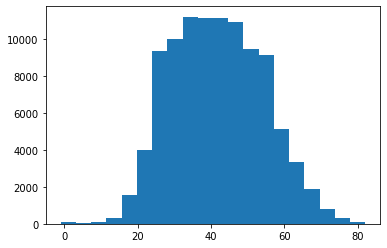

In [92]:
plt.hist(df_sel.age_during_first_diagnosis, bins = 20)
plt.show()

In [0]:
df_sel_aom = df_sel[~(df_sel.avg_opc_other_branded_aoms.isna())^(df_sel.avg_opc_generic_aoms.isna())^(df_sel.avg_opc_saxenda.isna())]


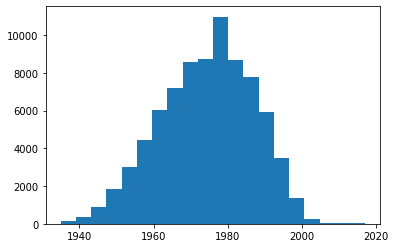

In [94]:
# plt.figure(figsize=(10,6))
plt.hist(df_sel_aom.patient_birth_year, bins=20)
plt.show()

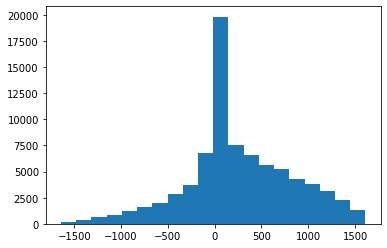

In [95]:
plt.hist(df_sel_aom.days_between_first_diag_first_prescr, bins = 20)
plt.show()

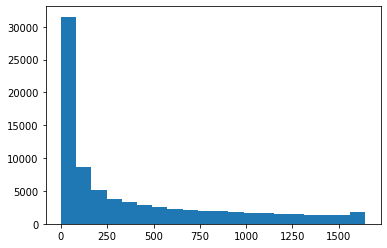

In [96]:
plt.hist(df_sel_aom.days_between_first_prescr_latest_prescr, bins = 20)
plt.show()

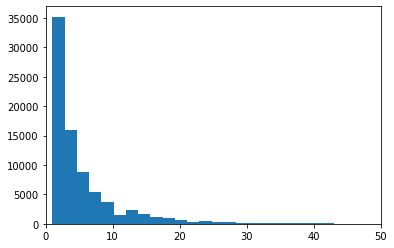

In [97]:
plt.hist(df_sel_aom.total_pd_claims, bins = 100)
plt.xlim((0,50))
plt.show()

In [99]:
df_sel_aom.rx_most_freq_plantrak_id.value_counts()

1.000100e+04    17312
8.888880e+09     3780
1.367037e+07     2208
7.000560e+09     2065
3.571000e+07     1387
                ...  
3.008500e+04        1
7.000162e+09        1
1.108000e+07        1
3.780000e+07        1
4.064000e+07        1
Name: rx_most_freq_plantrak_id, Length: 3596, dtype: int64

In [113]:
df_sel_aom.rx_most_freq_plantrak_id.unique().shape

(3597,)

In [111]:
df_sel_aom.shape[0]

79872

In [109]:
df_sel_aom.rx_most_freq_plantrak_id.isna().sum()

1335

In [108]:
df_sel_aom[df_sel_aom.avg_opc_saxenda>0].nni_saxenda_target.sum()/df_sel_aom[df_sel_aom.avg_opc_saxenda>0].nni_saxenda_target.shape[0]

0.6714997734481196